# Project in Data Intensive Computing
Authors: Alex Hermansson and Elin Samuelsson

## SparkSession

In this cell, we simply initiliaze the sparkSession and import some libraries we use.

In [1]:
import sys
!{sys.executable} -m pip install pyspark

import os
from pyspark.sql import SparkSession
from pyspark.mllib.linalg.distributed import RowMatrix

import numpy as np
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

spark = SparkSession.builder.master("local[*]").appName("DataIntensive project").getOrCreate()


You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Visualization

Read the resulting text file, and display a 2d plot

In [2]:
f = open("results/u_10_2d/part-00000", "r")
lines = f.readlines()
num_people = len(lines)
f.close()

x = []
y = []

for line in lines:
    line = line.replace("[", "")
    line = line.replace("]", "")
    x.append(line.split(",")[0])
    y.append(line.split(",")[1])

In [3]:
f = open("results/info/part-00000", "r")
lines = f.readlines()
f.close()

names = []
parties = []
sexes = []
constituencies = []
ages = []

for line in lines:
    line = line.replace("[", "")
    line = line.replace("]", "")
    names.append(line.split(",")[0])
    parties.append(line.split(",")[1])
    sexes.append(line.split(",")[2])
    constituencies.append(line.split(",")[3])
    ages.append(int(line.split(",")[4].replace("\n", "")))

### Plotting Function
A function to nicely visualize our results and show labels etc.

In [4]:
def fancy_plot(symbols, unique_symbols, colors, markers, labels):
    my_handles = [mlines.Line2D([], [], color=c, marker=m, linestyle='None',markersize=9, label=l)
          for c, m, l in zip(colors, markers, labels)]

    for i in range(0, num_people):
        plt.plot(x[i], y[i], symbols[i])

    plt.title('Dimensionality reduction with SVD to 2D')
    plt.legend(handles=my_handles, bbox_to_anchor=(1.01,1.03), loc="upper left")

## Plotting ~ Political Party

### Setup
Here we store markers, colors and labels for each party

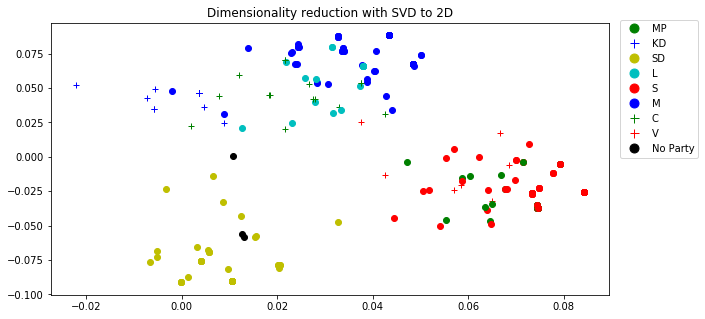

In [5]:
symbols = []
for party in parties:
    if party == "M":
        symbols.append("bo")
    elif party == "S":
        symbols.append("ro")
    elif party == "KD":
        symbols.append("b+")
    elif party == "MP":
        symbols.append("go")
    elif party == "SD":
        symbols.append("yo")
    elif party == "C":
        symbols.append("g+")
    elif party == "V":
        symbols.append("r+")
    elif party == "L":
        symbols.append("co")
    else:
        symbols.append("ko")

unique_symbols = ['go', 'b+', 'yo', 'co', 'ro', 'bo', 'g+', 'r+', 'ko']
colors = [s[0] for s in unique_symbols]
markers = [s[1] for s in unique_symbols]
labels = ['MP', 'KD', 'SD', 'L', 'S', 'M', 'C', 'V', 'No Party']


fancy_plot(symbols, unique_symbols, colors, markers, labels)

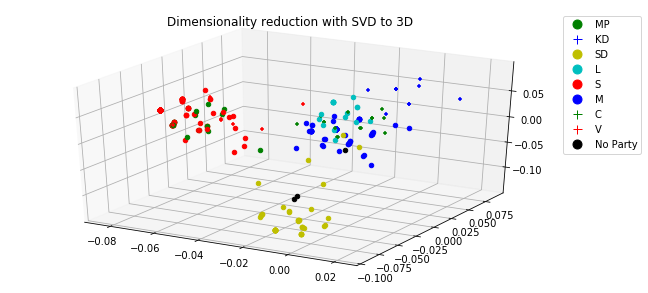

In [6]:
from mpl_toolkits.mplot3d import Axes3D

f = open("results/u_10_3d/part-00000", "r")
lines = f.readlines()
num_people = len(lines)
f.close()

xs = []
ys = []
zs = []

for line in lines:
    line = line.replace("\n", "")
    line = line.replace("[", "")
    line = line.replace("]", "")
    values = line.split(',')
    xs.append(values[0])
    ys.append(values[1])
    zs.append(values[2])
    
xs = np.array(xs, dtype=float)
ys = np.array(ys, dtype=float)
zs = np.array(zs, dtype=float)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(num_people):
    color = symbols[i][0]
    marker = symbols[i][1]
    ax.scatter(xs[i], ys[i], zs[i], c=color, marker=marker)

    
plt.title('Dimensionality reduction with SVD to 3D')
    
my_handles = [mlines.Line2D([], [], color=c, marker=m, linestyle='None',markersize=9, label=l)
      for c, m, l in zip(colors, markers, labels)]
plt.legend(handles=my_handles, bbox_to_anchor=(0.98, 1.0), loc="upper left")

## Plotting ~ Sex

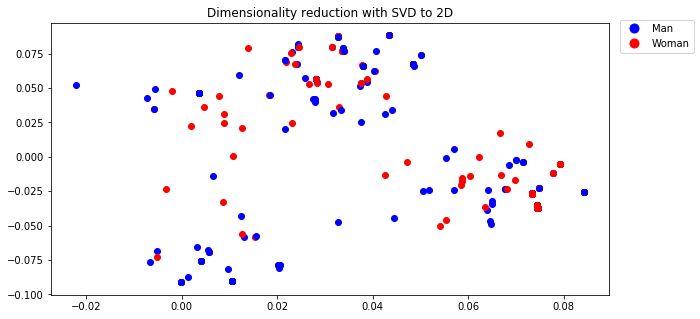

In [7]:
symbols = []
for i in sexes:
    if i == "man":
        symbols.append("bo")
    elif i == "kvinna":
        symbols.append("ro")

unique_symbols = ['bo', 'ro']
colors = [s[0] for s in unique_symbols]
markers = [s[1] for s in unique_symbols]
labels = ['Man', 'Woman']

fancy_plot(symbols, unique_symbols, colors, markers, labels)

## Plotting ~ Age

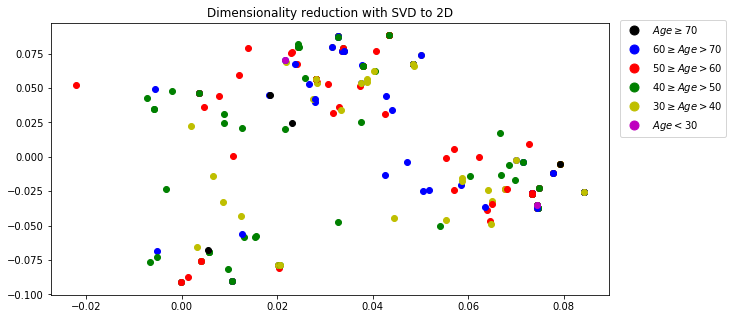

In [8]:
symbols = []
for age in ages:
    if age >= 70:
        symbols.append("ko")
    elif age >= 60:
        symbols.append("bo")
    elif age >= 50:
        symbols.append("ro")
    elif age >= 40:
        symbols.append("go")
    elif age >= 30:
        symbols.append("yo")
    else:
        symbols.append("mo")

unique_symbols = ['ko', 'bo', 'ro', 'go', 'yo', 'mo']
colors = [s[0] for s in unique_symbols]
markers = [s[1] for s in unique_symbols]
labels = ['$Age \geq 70$', '$60 \geq Age > 70$', '$50 \geq Age > 60$', '$40 \geq Age > 50$',
         '$30 \geq Age > 40$', '$Age < 30$']

fancy_plot(symbols, unique_symbols, colors, markers, labels)